In [1]:
import os

# Only needed for tensorflow versions greater than 2.16.0
os.environ["TF_USE_LEGACY_KERAS"] = "1"

import sys
sys.path.insert(1,"../scripts/")
import forecast_gfs


2025-09-28 16:40:29.191713: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-28 16:40:29.252436: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-28 16:40:30.611876: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import importlib
importlib.reload(forecast_gfs)

forecast_gfs.make_fcst()


2024-04-20


2025-09-28 16:43:45.276449: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'gen/add_26/add' exist for missing node 'gen/add_25/add'.


50/50 [==============================] - 16s 320ms/step


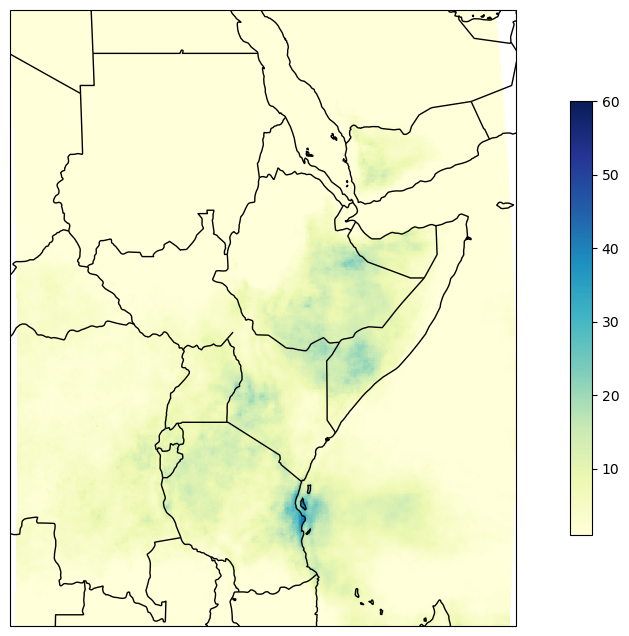

In [5]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
dates = np.asarray(forecast_gfs.dates,dtype='datetime64[D]')
d = dates[0].astype(object)
path_to_file = forecast_gfs.output_folder+f"test/{d.year}/GAN_{d.year}{d.month:02}{d.day:02}.nc"

ds = xr.open_dataset(path_to_file)


fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
c = plt.pcolormesh(ds.longitude.values, ds.latitude.values, np.squeeze(ds.precipitation.mean(['valid_time','member']).values*24),
                   transform=ccrs.PlateCarree(), cmap='YlGnBu',vmin=1,vmax=60)

cb = plt.colorbar(c, fraction=0.02)